# Defining Directories and categories first print data

[[ 41  41  41 ...  25  24  24]
 [ 40  40  40 ...  25  24  24]
 [ 39  39  39 ...  25  24  24]
 ...
 [165 168 174 ...  48  44  41]
 [157 161 167 ...  47  43  41]
 [151 155 163 ...  47  43  42]]


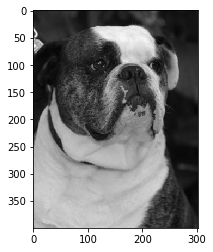

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pandas as pd
from keras.utils import np_utils

TRAIN_DATADIR = "/home/igormacedo/ai/PetImages/database/"
TEST_DATADIR = "/home/igormacedo/ai/PetImages/"
CATEGORIES = ["Dog", "Cat"]
img_array = []


for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(TRAIN_DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        print(img_array)
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [4]:
print(img_array)

[[ 41  41  41 ...  25  24  24]
 [ 40  40  40 ...  25  24  24]
 [ 39  39  39 ...  25  24  24]
 ...
 [165 168 174 ...  48  44  41]
 [157 161 167 ...  47  43  41]
 [151 155 163 ...  47  43  42]]


In [5]:
print(img_array.shape)

(400, 303)


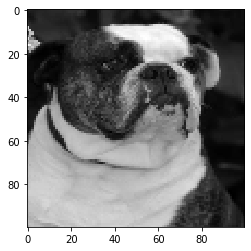

(100, 100)


In [6]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
new_array2 = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.imshow(new_array2, cmap='gray')
plt.show()
print(new_array.shape)

# Create training and test data

In [56]:
training_data = []
test_data = []
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path_train = os.path.join(TRAIN_DATADIR,category)  # create path to dogs and cats to train
        path_test = os.path.join(TEST_DATADIR,category)  # create path to dogs and cats to test
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path_train)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path_train,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num, int(img.split('.')[0])])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
        for img in tqdm(os.listdir(path_test)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path_test,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array2 = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                test_data.append([new_array2, class_num,int(img.split('.')[0])])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass            
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))
print(len(test_data))
print(training_data)


100%|██████████| 12501/12501 [00:08<00:00, 1492.19it/s]

201
24946
[[array([[ 40,  40,  39, ...,  19,  23,  24],
       [ 31,  35,  36, ...,  19,  23,  24],
       [ 27,  28,  33, ...,  20,  23,  23],
       ...,
       [183, 178, 179, ...,  34,  45,  38],
       [180, 188, 185, ...,  37,  51,  44],
       [165, 182, 187, ...,  37,  51,  44]], dtype=uint8), 0, 57], [array([[150, 148, 149, ...,  54,  56,  55],
       [149, 149, 148, ...,  53,  48,  47],
       [148, 149, 148, ...,  67,  54,  42],
       ...,
       [168, 166, 165, ...,  97,  87,  82],
       [167, 166, 166, ...,  89,  87,  83],
       [166, 165, 167, ...,  86,  85,  81]], dtype=uint8), 0, 563], [array([[136, 150, 137, ..., 187, 132,  90],
       [137, 152, 136, ...,  95, 184, 127],
       [178, 190, 144, ...,  97, 133, 102],
       ...,
       [217, 204, 207, ..., 133, 129, 138],
       [209, 200, 218, ..., 151, 133, 141],
       [209, 222, 212, ..., 164, 153, 140]], dtype=uint8), 0, 844], [array([[146, 172, 164, ...,  45,  42,  36],
       [159, 155, 170, ...,  48,  64,  61]

In [57]:
import random

random.shuffle(training_data)
random.shuffle(test_data)

# Reshape training and test data

In [58]:
X_test = []
X_train = []
y_test = []
y_train = []
z_train = []
z_test = []

for features,label,file_name in training_data:
    X_train.append(features)
    y_train.append(label)
    z_train.append(file_name)

print(X_train[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

for features,label,file_name in test_data:
    X_test.append(features)
    y_test.append(label)
    z_test.append(file_name)

#print(X_test[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [254]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [254]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [254]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [254]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [254]]]]


In [59]:
import pickle

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test,pickle_out)

pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train,pickle_out)

pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()


# Saving data on pickle files

In [60]:
#We can always load it in to our current script, or a totally new one by doing:

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

# Apply data on first training machine

In [61]:
import tensorflow as tf
#from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import keras

import pickle

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

y_test = np_utils.to_categorical(y_test,2)
y_train = np_utils.to_categorical(y_train,2)

X_train = X_train/255.0
X_test = X_test/255.0

model = Sequential()

model.add(Conv2D(20, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(20, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(20))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])
print("reinaldo")
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.3)
#print("score of the model test:")
#score = model.evaluate(X_test, y_test, verbose=0)
#print(score)
print("Calculating prediction")
prediction = model.predict(X_test, batch_size=1)
print(prediction)
print("done")


reinaldo
Train on 140 samples, validate on 61 samples
Epoch 1/5
140/140 [==============================] - 0s 3ms/sample - loss: 0.9685 - categorical_accuracy: 0.4000 - val_loss: 0.8092 - val_categorical_accuracy: 0.5082
Epoch 2/5
140/140 [==============================] - 0s 2ms/sample - loss: 0.7471 - categorical_accuracy: 0.4929 - val_loss: 0.7141 - val_categorical_accuracy: 0.4918
Epoch 3/5
140/140 [==============================] - 0s 2ms/sample - loss: 0.6884 - categorical_accuracy: 0.5000 - val_loss: 0.6963 - val_categorical_accuracy: 0.4918
Epoch 4/5
140/140 [==============================] - 0s 2ms/sample - loss: 0.6553 - categorical_accuracy: 0.6000 - val_loss: 0.6821 - val_categorical_accuracy: 0.5574
Epoch 5/5
140/140 [==============================] - 0s 2ms/sample - loss: 0.6372 - categorical_accuracy: 0.7000 - val_loss: 0.6696 - val_categorical_accuracy: 0.6557
score of the model test:
[0.6840756267349808, 0.57580376]
[[0.51629823 0.48370183]
 [0.50077444 0.49922556]
 [0

# sorting the predictions without lose index 

In [62]:
pred_index = np.argsort(prediction)

#print(S_pred)
print(type(prediction[:1]))
print(prediction)
print(prediction.shape)
    

<class 'numpy.ndarray'>
[[0.51629823 0.48370183]
 [0.50077444 0.49922556]
 [0.51294553 0.48705447]
 ...
 [0.5080696  0.49193045]
 [0.46949896 0.530501  ]
 [0.47315633 0.5268437 ]]
(24946, 2)


In [63]:
from numpy.random import rand
testando = [rand(2), rand(2), rand(2)]
testando=np.array(testando)
testando_value = np.sort(testando,axis=1)
testando_index = np.argsort(testando)
print(testando_value)
print(testando_index)

[[0.165104   0.44406617]
 [0.56523808 0.69432159]
 [0.74931476 0.87016632]]
[[0 1]
 [0 1]
 [0 1]]


In [64]:
pre = prediction
print(pre)
print(pre.shape)
print(z_test)

[[0.51629823 0.48370183]
 [0.50077444 0.49922556]
 [0.51294553 0.48705447]
 ...
 [0.5080696  0.49193045]
 [0.46949896 0.530501  ]
 [0.47315633 0.5268437 ]]
(24946, 2)
[7517, 5073, 5766, 6920, 6057, 7839, 2196, 2056, 2333, 2418, 5292, 4002, 3671, 3634, 10442, 11343, 9769, 6708, 2607, 10110, 7670, 4314, 852, 6557, 185, 11696, 10939, 5667, 85, 11394, 3789, 11187, 10593, 5801, 112, 3743, 2621, 9874, 8618, 8433, 10154, 9232, 11448, 5216, 11866, 2154, 9824, 8047, 10775, 11418, 9847, 6378, 9237, 4897, 8814, 6403, 3543, 11588, 12311, 11991, 9820, 11519, 4192, 3915, 5619, 3497, 10636, 3418, 10216, 8241, 9302, 1743, 1765, 2602, 2822, 3854, 11375, 10692, 5153, 7547, 3245, 12244, 2054, 11520, 2864, 2636, 11449, 11418, 4661, 11092, 216, 4391, 11334, 2594, 1854, 7993, 9172, 8858, 4769, 11819, 2635, 1564, 2800, 8173, 6379, 3361, 4076, 1172, 5712, 5842, 5986, 4609, 9424, 12430, 214, 9275, 10642, 11572, 497, 11771, 3264, 10826, 10807, 7711, 7097, 3056, 2116, 5027, 9014, 3385, 653, 9351, 1218, 2610, 383

In [85]:
pre = prediction

label_pred = np.insert(pre, 2, z_test , axis =1)

print(label_pred)
print(label_pred.shape)

[[5.1629823e-01 4.8370183e-01 7.5170000e+03]
 [5.0077444e-01 4.9922556e-01 5.0730000e+03]
 [5.1294553e-01 4.8705447e-01 5.7660000e+03]
 ...
 [5.0806957e-01 4.9193045e-01 9.1100000e+03]
 [4.6949896e-01 5.3050101e-01 1.2198000e+04]
 [4.7315633e-01 5.2684373e-01 1.7570000e+03]]
(24946, 3)


In [92]:
#cat_sorte = np.sort(label_pred, axis = 0)[::-1]
cat_sort = label_pred[label_pred[:,0].argsort()]
print(cat_sort[::-1])

[[7.5046682e-01 2.4953318e-01 1.2004000e+04]
 [7.1803552e-01 2.8196442e-01 1.6460000e+03]
 [7.1226925e-01 2.8773075e-01 1.4030000e+03]
 ...
 [3.1252608e-01 6.8747389e-01 2.3260000e+03]
 [2.9306096e-01 7.0693904e-01 1.0636000e+04]
 [2.6775530e-01 7.3224467e-01 1.4750000e+03]]
